In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
df = pd.read_csv('Billionaire.csv')
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


We'll work with a data set about the world's billionaires from 2021 (https://www.forbes.com/real-time-billionaires/#49c85f6e3d78).  This data is contained in the "Billionaire.csv" file located in the same folder.


## 1. Understanding the Billionaires Data 


In [38]:
df.head(15)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


## 2. Billionaires Data Basics 

Dimensions of the data.

In [39]:
df.shape


(2755, 7)

## 3. Variable Types 

In [40]:
df.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

## 4. Asking and Answering Questions

In the following further analysis of data will be preformed to ask a proper question. 

# 5. Cleaning Data:

From <span style="color:#6495ED">string</span> to <span style="color:#6495ED">float</span>.


In [41]:
#Since num_rows_with_b is the same as number of rows we can do this
df['Worth'] = df['NetWorth'].str.replace('$', '').str.replace('B', '')
#Lets make sure worth is a float
df['Worth'] = df['Worth'].astype(float)

# 6. Basic Data Insights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Automotive'),
  Text(2, 0, 'Fashion & Retail'),
  Text(3, 0, 'Finance & Investments'),
  Text(4, 0, 'Diversified'),
  Text(5, 0, 'Food & Beverage'),
  Text(6, 0, 'Telecom'),
  Text(7, 0, 'Media & Entertainment'),
  Text(8, 0, 'Service'),
  Text(9, 0, 'Gambling & Casinos'),
  Text(10, 0, 'Manufacturing'),
  Text(11, 0, 'Real Estate'),
  Text(12, 0, 'Metals & Mining'),
  Text(13, 0, 'Energy'),
  Text(14, 0, 'Logistics'),
  Text(15, 0, 'Healthcare'),
  Text(16, 0, 'Construction & Engineering'),
  Text(17, 0, 'Sports')])

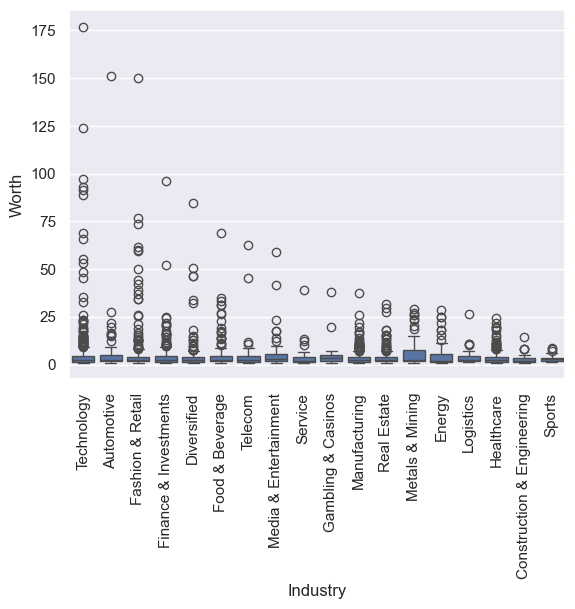

In [42]:
df.groupby('Industry')['Worth'].mean()
sns.boxplot(x='Industry', y='Worth', data=df)
plt.xticks(rotation=90)


### Graph Takeaway: Disregarding outliers, Metals and Mining seem to have a larger range of Net Worth. In addition, 50% make more than any other industries top 75%, besides maybe the Energy industry.


In [43]:
industry_iqr = df.groupby('Industry')['Worth'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print(industry_iqr)


Industry
Automotive                    3.250
Construction & Engineering    2.200
Diversified                   2.325
Energy                        3.925
Fashion & Retail              2.600
Finance & Investments         3.000
Food & Beverage               3.000
Gambling & Casinos            3.100
Healthcare                    2.500
Logistics                     2.850
Manufacturing                 2.250
Media & Entertainment         3.850
Metals & Mining               5.850
Real Estate                   2.200
Service                       2.550
Sports                        1.850
Technology                    3.100
Telecom                       3.275
Name: Worth, dtype: float64


In [68]:
industry_3q = df.groupby('Industry')['Worth'].apply(lambda x: x.quantile(0.75))
print(industry_3q)


Industry
Automotive                    4.850
Construction & Engineering    3.400
Diversified                   3.825
Energy                        5.400
Fashion & Retail              4.200
Finance & Investments         4.500
Food & Beverage               4.600
Gambling & Casinos            4.900
Healthcare                    4.000
Logistics                     4.450
Manufacturing                 3.700
Media & Entertainment         5.700
Metals & Mining               7.450
Real Estate                   3.800
Service                       3.800
Sports                        3.650
Technology                    4.600
Telecom                       4.675
Name: Worth, dtype: float64


Turns out that only Media top 75% make more than Metals top 50%. So based on this if you wanted to make money your best chances for making the most on average is being in the Metals & Mining Industry. Of course this is based on the thought that since these are the top Billionaires in the world than through money trickling down the food chain more money would reach employers, without knowing anything else. 

# 7. Analyzing the Graph further 

The graph is super small to really pinpoint anything. The following goal is to figure out where majority of the data lies.


In [45]:
percent_worth_1_to_10 = (df[(df['Worth'] >= 1) & (df['Worth'] <= 10)].shape[0] / df.shape[0]) * 100
percent_worth_1_to_10


91.76043557168784

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Finance & Investments'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Metals & Mining'),
  Text(5, 0, 'Fashion & Retail'),
  Text(6, 0, 'Diversified'),
  Text(7, 0, 'Media & Entertainment'),
  Text(8, 0, 'Energy'),
  Text(9, 0, 'Real Estate'),
  Text(10, 0, 'Automotive'),
  Text(11, 0, 'Sports'),
  Text(12, 0, 'Telecom'),
  Text(13, 0, 'Food & Beverage'),
  Text(14, 0, 'Construction & Engineering'),
  Text(15, 0, 'Logistics'),
  Text(16, 0, 'Gambling & Casinos'),
  Text(17, 0, 'Service')])

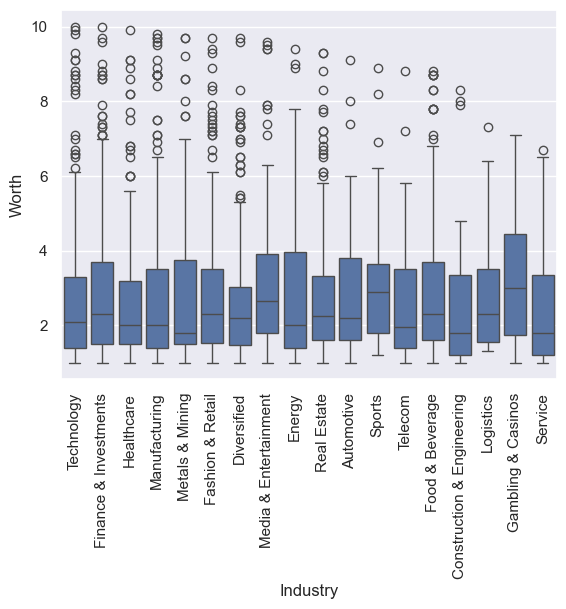

In [46]:
df_range = df[(df['Worth'] >= 1) & (df['Worth'] <= 10)]
df_range.groupby('Industry')['Worth'].mean()
sns.boxplot(x='Industry', y='Worth', data=df_range)
plt.xticks(rotation=90)

#### Graph Takeaway: The idea here was to see if there was any one industry that was significantly different from all the rest of the industries
We can see that the 2 biggest IQR are Sports and Gambling & Casinos, now normally the conclusion would be that we can expect that anyone who were to go into these two industries would be expected, on average, to be worth more than anyone else. However, if the margins were to be taken into considerations all industries IQR are between 2 and 4 BILLION dollars, thats chump change compared to what the top 1% make. 


## 8. The 1%


In [47]:
two = (df[(df['Worth'] >= 50) & (df['Worth'] <= 200)].shape[0] / df.shape[0]) * 100
two

0.8711433756805809

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Automotive'),
  Text(2, 0, 'Fashion & Retail'),
  Text(3, 0, 'Finance & Investments'),
  Text(4, 0, 'Diversified'),
  Text(5, 0, 'Food & Beverage'),
  Text(6, 0, 'Telecom'),
  Text(7, 0, 'Media & Entertainment')])

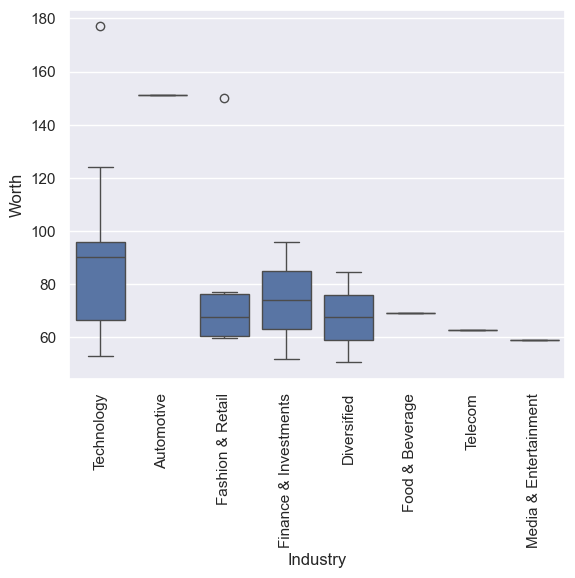

In [48]:
df_range = df[(df['Worth'] >= 50) & (df['Worth'] <= 200)]
df_range.groupby('Industry')['Worth'].mean()
sns.boxplot(x='Industry', y='Worth', data=df_range)
plt.xticks(rotation=90)

#### Graph Takeaway: Technology has a decent amount of range in this set range. Fashion Finance and Diversified as well. We are looking at 24 billionares here. Majority of them are in Technology. Only one in Automotive (Elon 🙄), and perhaps 2 in each of Food, Telecom and Media industry.



In [49]:
#How many billionares is that?
0.008711433756805809 * 2755

24.000000000000004

In [50]:
tech_industries = df[(df['Industry'] == 'Technology') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)


10


In [51]:
tech_industries = df[(df['Industry'] == 'Fashion & Retail') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)

6


In [52]:
tech_industries = df[(df['Industry'] == 'Finance & Investments') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)

2


In [53]:
tech_industries = df[(df['Industry'] == 'Diversified') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)

2


In [54]:
tech_industries = df[(df['Industry'] == 'Food & Beverage') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)

1


In [55]:
tech_industries = df[(df['Industry'] == 'Telecom') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)

1


In [56]:
tech_industries = df[(df['Industry'] == 'Media & Entertainment') & (df['Worth'] >= 50) & (df['Worth'] <= 200)]
num_tech_industries = tech_industries.shape[0]
print(num_tech_industries)

1


Even though we are looking at individual people, I would say that it may be worth looking INTO these individual people and see what they are doing that the other billionaires are not doing which is making the top 1 % what they are making. 

# Other insights


In [57]:
df.nsmallest(10,'Age')

,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth
940,Kevin David Lehmann,$3.3 B,Germany,drugstores,925,18.0,Fashion & Retail,3.3
2122,Wang Zelong,$1.5 B,China,chemicals,2035,24.0,Metals & Mining,1.5
2143,Alexandra Andresen,$1.4 B,Norway,investments,2141,24.0,Diversified,1.4
2144,Katharina Andresen,$1.4 B,Norway,investments,2141,25.0,Diversified,1.4
1338,Austin Russell,$2.4 B,United States,★,1299,26.0,Automotive,2.4
661,Gustav Magnar Witzoe,$4.4 B,Norway,fish farming,655,27.0,Food & Beverage,4.4
1596,Andy Fang,$2 B,United States,food delivery app,1580,28.0,Technology,2.0
1645,Stanley Tang,$2 B,United States,food delivery app,1580,28.0,Technology,2.0
274,Sam Bankman-Fried,$8.7 B,United States,cryptocurrency,274,29.0,Finance & Investments,8.7
1328,Jonathan Kwok,$2.4 B,Hong Kong,Real Estate,1299,29.0,Real Estate,2.4


### Hm theres a star, are there other stars? Data Cleaning?

In [58]:
df[df['Source'] == '★']

,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth
234,Mat Ishbia,$9.7 B,United States,★,234,41.0,Finance & Investments,9.7
1028,Justin Ishbia,$3 B,United States,★,1008,43.0,Finance & Investments,3.0
1338,Austin Russell,$2.4 B,United States,★,1299,26.0,Automotive,2.4
1416,Andrew Paradise,$2.3 B,United States,★,1362,38.0,Media & Entertainment,2.3
1685,"William Foley, II.",$1.9 B,United States,★,1664,76.0,Finance & Investments,1.9
1890,Shalom Meckenzie,$1.7 B,Israel,★,1833,44.0,Gambling & Casinos,1.7
1954,Henrik Fisker,$1.6 B,United States,★,1931,57.0,Automotive,1.6
1960,Geeta Gupta-Fisker,$1.6 B,United Kingdom,★,1931,46.0,Automotive,1.6
2213,Trevor Milton,$1.4 B,United States,★,2141,39.0,Automotive,1.4
2463,Chamath Palihapitiya,$1.2 B,United States,★,2378,44.0,Finance & Investments,1.2


Unsure what the star means but all the other data seems appropriate to include. 

In [59]:
df.corr(numeric_only = True)

,Rank,Age,Worth
Rank,1.000000,-0.104628,-0.475346
Age,-0.104628,1.000000,0.033742
Worth,-0.475346,0.033742,1.000000


### How come the correlation for Rank and Worth is not 1? Rank is based off of your networth. 

In [60]:
df.nsmallest(100, 'Worth')

,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth
2673,A. Jayson Adair,$1 B,United States,damaged cars,2674,51.0,Automotive,1.0
2674,Albert Avdolyan,$1 B,Russia,"oil, mining",2674,50.0,Energy,1.0
2675,Baiju Bhatt,$1 B,United States,stock trading app,2674,36.0,Finance & Investments,1.0
2676,"Wilbur 'Ed' Bosarge, Jr.",$1 B,United States,high speed trading,2674,81.0,Finance & Investments,1.0
2677,Ina Chan,$1 B,Hong Kong,casinos,2674,67.0,Gambling & Casinos,1.0
...,...,...,...,...,...,...,...,...
2536,Chen Jiancheng,$1.1 B,China,manufacturing,2524,62.0,Manufacturing,1.1
2537,Chen Jinshi & family,$1.1 B,China,"construction, real estate",2524,58.0,Real Estate,1.1
2538,Chen Yuantai,$1.1 B,China,batteries,2524,53.0,Energy,1.1
2539,Cheng Antares,$1.1 B,Hong Kong,liquor,2524,63.0,Food & Beverage,1.1


In [61]:
df.nsmallest(1500, 'Worth')

,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth
2673,A. Jayson Adair,$1 B,United States,damaged cars,2674,51.0,Automotive,1.0
2674,Albert Avdolyan,$1 B,Russia,"oil, mining",2674,50.0,Energy,1.0
2675,Baiju Bhatt,$1 B,United States,stock trading app,2674,36.0,Finance & Investments,1.0
2676,"Wilbur 'Ed' Bosarge, Jr.",$1 B,United States,high speed trading,2674,81.0,Finance & Investments,1.0
2677,Ina Chan,$1 B,Hong Kong,casinos,2674,67.0,Gambling & Casinos,1.0
...,...,...,...,...,...,...,...,...
1286,Carlos Sanchez,$2.5 B,Brazil,generic drugs,1249,59.0,Healthcare,2.5
1287,Kavitark Ram Shriram,$2.5 B,United States,"venture capital, Google",1249,64.0,Technology,2.5
1288,André Street,$2.5 B,Brazil,fintech,1249,36.0,Technology,2.5
1289,Sun Mengquan & family,$2.5 B,China,edible oil,1249,71.0,Food & Beverage,2.5


#### As we see there are a lot of ties, how does the dataset or whoever came up with the data set determine who is ranked higher in ties. Is it possible that there is a correlation to your networth and what country you are from? Which industry you work in?

In [62]:
industries = df['Industry'].unique()
print(industries)


['Technology' 'Automotive' 'Fashion & Retail' 'Finance & Investments'
 'Diversified' 'Food & Beverage' 'Telecom' 'Media & Entertainment'
 'Service' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Logistics' 'Healthcare'
 'Construction & Engineering' 'Sports']


In [69]:
#Associating each industry with a number in order to see a potential correlation. This can potentially answer questions based on the above graphs. 
df['Industry_Number'] = pd.factorize(df['Industry'])[0]
df


,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth,Industry_Number,Country_Number,NewRank
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0,0,0,1.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0,1,0,2.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0,2,1,3.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0,0,0,4.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0,0,4,2674.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0,10,4,2674.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0,12,4,2674.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0,4,4,2674.0


In [64]:
df['Country_Number'] = pd.factorize(df['Country'])[0]
df

,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth,Industry_Number,Country_Number
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0,0,0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0,1,0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0,2,1
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0,0,0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0,0,4
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0,10,4
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0,12,4
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0,4,4


In [65]:
df.corr(numeric_only = True)

,Rank,Age,Worth,Industry_Number,Country_Number
Rank,1.000000,-0.104628,-0.475346,0.040683,0.067072
Age,-0.104628,1.000000,0.033742,0.088568,0.033614
Worth,-0.475346,0.033742,1.000000,-0.092362,-0.089511
Industry_Number,0.040683,0.088568,-0.092362,1.000000,-0.017072
Country_Number,0.067072,0.033614,-0.089511,-0.017072,1.000000


### So there is no correlation between where you are from and what industry you work in that determines your networth. Which leaves an unanswered question of why is someone ranked much lower than someone who is worth the same?

In [66]:
df['NewRank'] = df['Worth'].rank(ascending=False, method='min')
df



,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth,Industry_Number,Country_Number,NewRank
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0,0,0,1.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0,1,0,2.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0,2,1,3.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0,0,0,4.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1.0,0,4,2674.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0,10,4,2674.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0,12,4,2674.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0,4,4,2674.0


In [83]:
df.nsmallest(83,'Worth')

,Name,NetWorth,Country,Source,Rank,Age,Industry,Worth,Industry_Number,Country_Number,NewRank
2673,A. Jayson Adair,$1 B,United States,damaged cars,2674,51.0,Automotive,1.0,1,0,2674.0
2674,Albert Avdolyan,$1 B,Russia,"oil, mining",2674,50.0,Energy,1.0,13,11,2674.0
2675,Baiju Bhatt,$1 B,United States,stock trading app,2674,36.0,Finance & Investments,1.0,3,0,2674.0
2676,"Wilbur 'Ed' Bosarge, Jr.",$1 B,United States,high speed trading,2674,81.0,Finance & Investments,1.0,3,0,2674.0
2677,Ina Chan,$1 B,Hong Kong,casinos,2674,67.0,Gambling & Casinos,1.0,9,10,2674.0
...,...,...,...,...,...,...,...,...,...,...,...
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1.0,10,4,2674.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1.0,12,4,2674.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1.0,4,4,2674.0
2754,Zhou Wei family,$1 B,China,Software,2674,54.0,Technology,1.0,0,4,2674.0


In [67]:
df.corr(numeric_only = True)

,Rank,Age,Worth,Industry_Number,Country_Number,NewRank
Rank,1.000000,-0.104628,-0.475346,0.040683,0.067072,1.000000
Age,-0.104628,1.000000,0.033742,0.088568,0.033614,-0.104628
Worth,-0.475346,0.033742,1.000000,-0.092362,-0.089511,-0.475346
Industry_Number,0.040683,0.088568,-0.092362,1.000000,-0.017072,0.040683
Country_Number,0.067072,0.033614,-0.089511,-0.017072,1.000000,0.067072
NewRank,1.000000,-0.104628,-0.475346,0.040683,0.067072,1.000000
